# Clustering Penguin Data and building prediction model.

# Daten einlesen

In [63]:
import pandas as pd

data = pd.read_csv('../data/external/penguins.csv')
data.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
92,Adelie,Dream,34.0,17.1,185.0,3400.0,female,2008
216,Gentoo,Biscoe,45.8,14.2,219.0,4700.0,female,2008
110,Adelie,Biscoe,38.1,16.5,198.0,3825.0,female,2009
310,Chinstrap,Dream,49.7,18.6,195.0,3600.0,male,2008
175,Gentoo,Biscoe,46.3,15.8,215.0,5050.0,male,2007


# Kategorische Variablen durch numerische ersetzen

In [64]:
data['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [65]:
species_replace_num = {
    'Adelie':0,
    'Gentoo':1,
    'Chinstrap':2
}
data['species'] = data['species'].replace(species_replace_num)

In [66]:
data.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [67]:
island_replace_num = {
    'Torgersen':0,
    'Biscoe':1,
    'Dream':2,
}
data['island'] = data.island.replace(island_replace_num)

In [68]:
data.sex.unique()

array(['male', 'female', nan], dtype=object)

In [69]:
age_replace_num = {
    'male':0,
    'female':1
}
data['sex'] = data.sex.replace(age_replace_num)

In [70]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,0,39.1,18.7,181.0,3750.0,0.0,2007
1,0,0,39.5,17.4,186.0,3800.0,1.0,2007
2,0,0,40.3,18.0,195.0,3250.0,1.0,2007
3,0,0,NaN,NaN,NaN,NaN,NaN,2007
4,0,0,36.7,19.3,193.0,3450.0,1.0,2007
...,...,...,...,...,...,...,...,...
339,2,2,55.8,19.8,207.0,4000.0,0.0,2009
340,2,2,43.5,18.1,202.0,3400.0,1.0,2009
341,2,2,49.6,18.2,193.0,3775.0,0.0,2009
342,2,2,50.8,19.0,210.0,4100.0,0.0,2009


# Datenbereinigung: Unbrauchbare Spalten droppen & unvollständige Daten entfernen.

In [71]:
data = data.drop(columns='year')

In [72]:
data.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [73]:
len(data.dropna())/len(data)

0.9680232558139535

In [74]:
data = data.dropna()
data.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [75]:
data.duplicated().sum()

0

In [76]:
labels = data['species']

# Lösche die Spalte aus dem Datensatz
data = data.drop(columns='species')

# Korrelationsmatrix berechnen:

In [77]:
corr = data.corr()
corr

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,1.000000,0.212038,0.189636,-0.162739,-0.201966,-0.005834
bill_length_mm,0.212038,1.000000,-0.228626,0.653096,0.589451,-0.344078
bill_depth_mm,0.189636,-0.228626,1.000000,-0.577792,-0.472016,-0.372673
flipper_length_mm,-0.162739,0.653096,-0.577792,1.000000,0.872979,-0.255169
body_mass_g,-0.201966,0.589451,-0.472016,0.872979,1.000000,-0.424987
sex,-0.005834,-0.344078,-0.372673,-0.255169,-0.424987,1.000000


In [78]:
corr.round(2)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,1.00,0.21,0.19,-0.16,-0.20,-0.01
bill_length_mm,0.21,1.00,-0.23,0.65,0.59,-0.34
bill_depth_mm,0.19,-0.23,1.00,-0.58,-0.47,-0.37
flipper_length_mm,-0.16,0.65,-0.58,1.00,0.87,-0.26
body_mass_g,-0.20,0.59,-0.47,0.87,1.00,-0.42
sex,-0.01,-0.34,-0.37,-0.26,-0.42,1.00


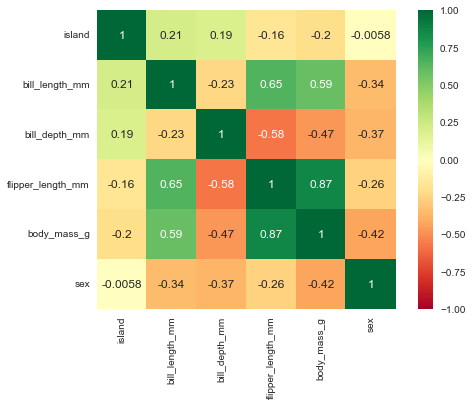

In [79]:
import seaborn as sns
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap='RdYlGn',
    square=True,
    annot=True
)

# Regression von Körpergewicht und Flipperlänge:

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

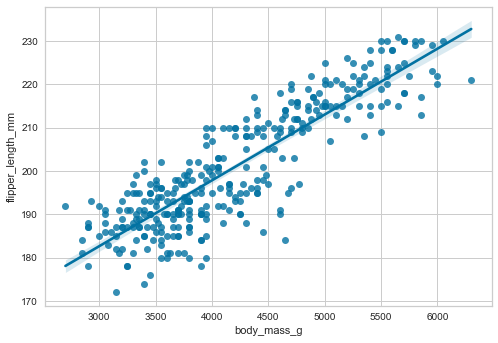

In [80]:
sns.regplot(data=data, x='body_mass_g', y='flipper_length_mm')

Ergebnis: Körpergröße und Flipperlänge korrelieren positiv miteinander.

<AxesSubplot:xlabel='body_mass_g', ylabel='island_cat'>

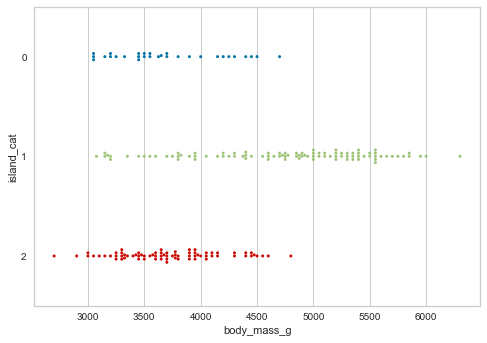

In [81]:
df_tmp = data.copy()
df_tmp['island_cat'] = df_tmp['island'].astype('category')
sns.swarmplot(data=df_tmp.sample(200),
              x='body_mass_g',
              y='island_cat',
              size=3)

# Clustern der Daten mit KMeans

In [82]:
data.mean()

island                  1.228228
bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
sex                     0.495495
dtype: float64

In [83]:
data.std()

island                 0.678088
bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
sex                    0.500732
dtype: float64

In [84]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(data)
X

array([[-1.8140371 , -0.89604189,  0.7807321 , -1.42675157, -0.56847478,
        -0.99103121],
       [-1.8140371 , -0.82278787,  0.11958397, -1.06947358, -0.50628618,
         1.00904996],
       [-1.8140371 , -0.67627982,  0.42472926, -0.42637319, -1.1903608 ,
         1.00904996],
       ...,
       [ 1.13987173,  1.02687621,  0.52644436, -0.56928439, -0.53738048,
        -0.99103121],
       [ 1.13987173,  1.24663828,  0.93330475,  0.64546078, -0.13315457,
        -0.99103121],
       [ 1.13987173,  1.13675725,  0.7807321 , -0.2120064 , -0.53738048,
         1.00904996]])

In [85]:
X.mean(axis=0)

array([ 1.06688098e-16, -1.02420575e-15, -1.28025718e-15,  2.56051436e-16,
       -1.28025718e-16, -3.20064295e-17])

In [86]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

In [87]:
data_scaled = pd.DataFrame(X, index=data.index, columns=data.columns)
data_scaled

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,-1.814037,-0.896042,0.780732,-1.426752,-0.568475,-0.991031
1,-1.814037,-0.822788,0.119584,-1.069474,-0.506286,1.009050
2,-1.814037,-0.676280,0.424729,-0.426373,-1.190361,1.009050
4,-1.814037,-1.335566,1.085877,-0.569284,-0.941606,1.009050
5,-1.814037,-0.859415,1.747026,-0.783651,-0.692852,-0.991031
...,...,...,...,...,...,...
339,1.139872,2.162314,1.340165,0.431094,-0.257532,-0.991031
340,1.139872,-0.090248,0.475587,0.073816,-1.003795,1.009050
341,1.139872,1.026876,0.526444,-0.569284,-0.537380,-0.991031
342,1.139872,1.246638,0.933305,0.645461,-0.133155,-0.991031


In [88]:
data_scaled_numpy = data_scaled.values
data_scaled_numpy

array([[-1.8140371 , -0.89604189,  0.7807321 , -1.42675157, -0.56847478,
        -0.99103121],
       [-1.8140371 , -0.82278787,  0.11958397, -1.06947358, -0.50628618,
         1.00904996],
       [-1.8140371 , -0.67627982,  0.42472926, -0.42637319, -1.1903608 ,
         1.00904996],
       ...,
       [ 1.13987173,  1.02687621,  0.52644436, -0.56928439, -0.53738048,
        -0.99103121],
       [ 1.13987173,  1.24663828,  0.93330475,  0.64546078, -0.13315457,
        -0.99103121],
       [ 1.13987173,  1.13675725,  0.7807321 , -0.2120064 , -0.53738048,
         1.00904996]])

In [89]:
type(data_scaled_numpy)

numpy.ndarray

In [90]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

In [91]:
predictions = model.labels_
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
data_with_predictions = data.copy()
data_with_predictions['cluster'] = predictions

In [93]:
data_with_predictions

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,0,39.1,18.7,181.0,3750.0,0.0,0
1,0,39.5,17.4,186.0,3800.0,1.0,0
2,0,40.3,18.0,195.0,3250.0,1.0,0
4,0,36.7,19.3,193.0,3450.0,1.0,0
5,0,39.3,20.6,190.0,3650.0,0.0,0
...,...,...,...,...,...,...,...
339,2,55.8,19.8,207.0,4000.0,0.0,0
340,2,43.5,18.1,202.0,3400.0,1.0,0
341,2,49.6,18.2,193.0,3775.0,0.0,0
342,2,50.8,19.0,210.0,4100.0,0.0,0


# Cluster analysieren

In [94]:
sns.set()

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

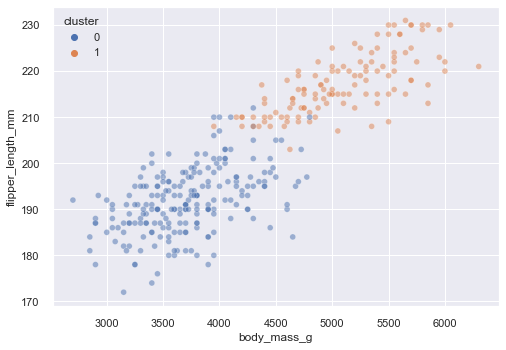

In [95]:
sns.scatterplot(data=data_with_predictions,
                x='body_mass_g',
                y='flipper_length_mm',
                alpha=0.5,
                hue='cluster')

Ergebnis: Die 2 Cluster teilen sich in schwere Pinguine mit langen Flippern und leichten Pinguinen mit kleineren Flippern auf.

In [96]:
data_with_predictions.groupby('cluster').mean()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
cluster,,,,,,
0,1.35514,42.004673,18.370561,191.920561,3714.719626,0.500000
1,1.00000,47.568067,14.996639,217.235294,5092.436975,0.487395


In [97]:
from matplotlib import pyplot as plt

<AxesSubplot:>

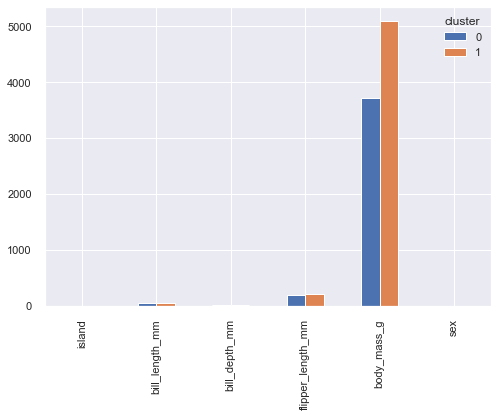

In [98]:
data_with_predictions.groupby('cluster').mean().T.plot.bar()

In [99]:
data_scaled_with_predictions = data_scaled.copy()
data_scaled_with_predictions['cluster'] = predictions

<AxesSubplot:>

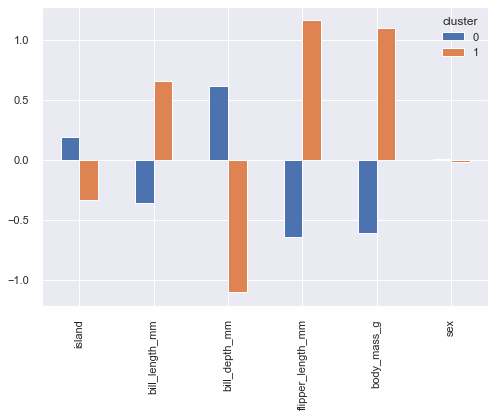

In [100]:
data_scaled_with_predictions.groupby('cluster').mean().T.plot.bar()

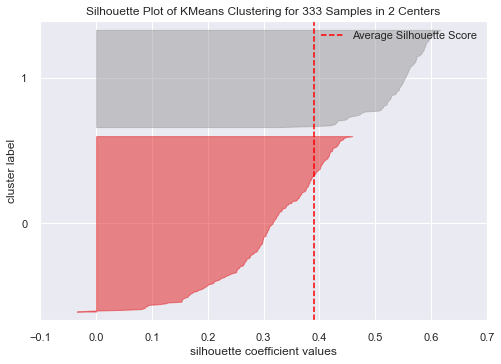

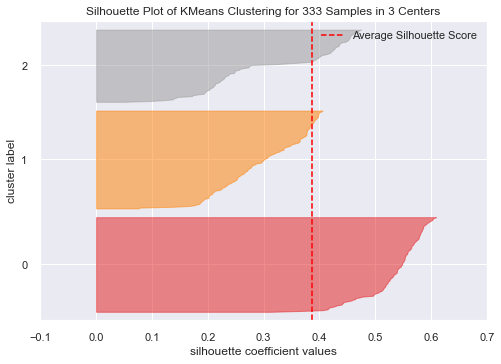

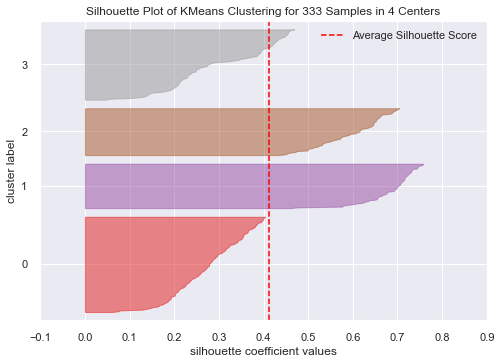

In [101]:
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
from matplotlib import pyplot as plt

for k in [2,3,4]:
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42))
    sil.fit(X)
    sil.finalize()
    plt.show()

<AxesSubplot:>

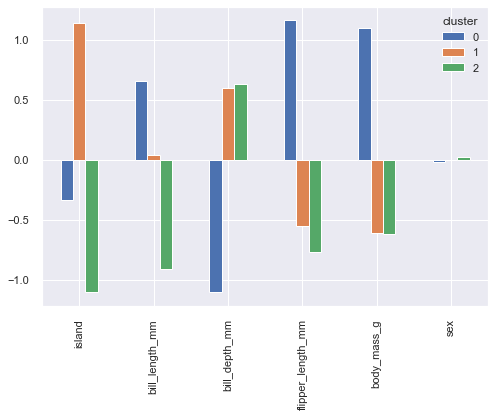

In [102]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42)
model.fit(X)
predictions = model.labels_

data_scaled_with_predictions = data_scaled.copy()
data_scaled_with_predictions['cluster'] = predictions

data_scaled_with_predictions.groupby('cluster').mean().T.plot.bar()

Cluster 0 = Eher von Insel 0, höhere bill Length, niedrigere bill depth, höhere flipper length und höheres Gewicht
Cluster 1 = Eher von Insel 1, höhere bill depth, niedrigere flipper length und niedrigeres Körpergewicht
Cluster 2 = Eher von Insel 2, niedrigere bill length, höhere bill depth, niedrigere flipper length und niedrigeres Gewicht

In [103]:
rows_per_cluster_per_column = data_scaled_with_predictions.groupby('cluster').count()
rows_per_cluster_per_column

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
cluster,,,,,,
0,119,119,119,119,119,119
1,123,123,123,123,123,123
2,91,91,91,91,91,91


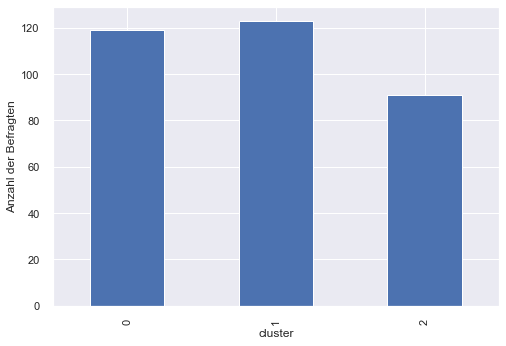

In [104]:
rows_per_cluster = rows_per_cluster_per_column.iloc[:,0]
rows_per_cluster.plot.bar(ylabel='Anzahl der Befragten')
plt.savefig('barp.png', dpi=150)

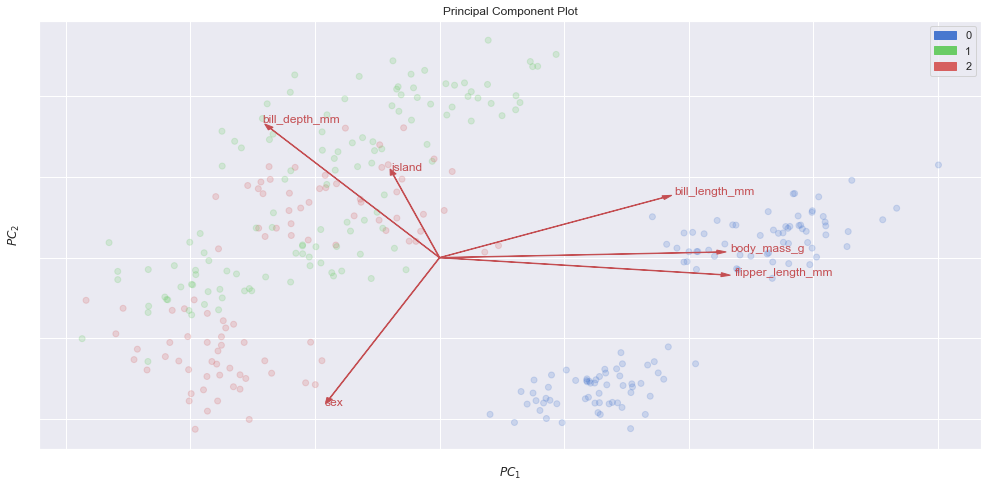

<AxesSubplot:title={'center':'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [105]:
from yellowbrick.features import PCA

classes = ['0', '1', '2']

visualizer = PCA(classes=classes,
                 proj_features=True,
                 alpha=0.2,
                 colormap='sns_muted',
                 size=(1000,500))

visualizer.fit_transform(data_scaled, predictions)
visualizer.show()

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca_fit = pca.fit(data_scaled)

<AxesSubplot:label='c77ac7f8-704a-4dbd-a366-ac61ead24806'>

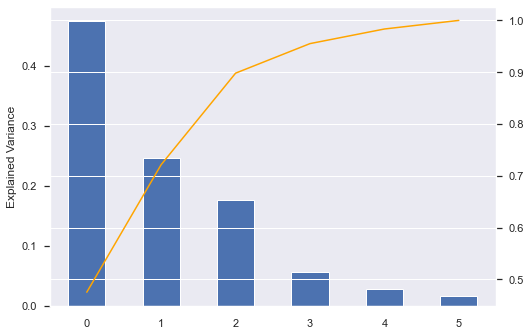

In [107]:
pd.Series(pca.explained_variance_ratio_).plot.bar(ylabel='Explained Variance')
pd.Series(pca.explained_variance_ratio_).cumsum().plot.line(
    secondary_y=True,
    color='orange')

# Klassifizierung

In [108]:
labels.value_counts()

0    146
1    119
2     68
Name: species, dtype: int64

In [109]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(data_scaled, labels)

KNeighborsClassifier()

In [110]:
data_to_predict = data_scaled.sample(5)
data_to_predict

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
24,-0.337083,-0.950982,0.017869,-1.498207,-0.506286,-0.991031
176,-0.337083,-0.200129,-2.067291,1.002739,0.986240,1.009050
249,-0.337083,0.532412,-1.304427,1.502928,0.830769,1.009050
94,1.139872,-1.427134,0.068726,-0.998018,-1.128172,1.009050
154,-0.337083,0.862055,-1.558715,0.645461,0.302166,1.009050


In [111]:
labels_to_predict = labels[data_to_predict.index]
labels_to_predict

24     0
176    1
249    1
94     0
154    1
Name: species, dtype: int64

In [112]:
model.predict(data_to_predict)

array([0, 1, 1, 0, 1], dtype=int64)

Ergebnis: Alle richtig vorhergesehen.

In [113]:
all_predictions = model.predict(data_scaled)

In [114]:
correct_predictions = all_predictions==labels
correct_predictions.value_counts(normalize=True)

True     0.996997
False    0.003003
Name: species, dtype: float64

# Beispieldaten ausdenken und Modell vorhersagen lassen

In [115]:
new_data_to_predict = pd.Series({
    'island':1,
    'bill_length_mm':50,
    'bill_depth_mm':15,
    'flipper_length_mm':200,
    'body_mass_g':4000,
    'sex':1
})
new_data_to_predict

island                  1
bill_length_mm         50
bill_depth_mm          15
flipper_length_mm     200
body_mass_g          4000
sex                     1
dtype: int64

In [116]:
new_data_to_predict_for_scaler = new_data_to_predict.values.reshape(1, -1)
new_data_to_predict_for_scaler

array([[   1,   50,   15,  200, 4000,    1]], dtype=int64)

In [117]:
new_data_to_predict_scaled = scaler.transform(new_data_to_predict_for_scaler)
new_data_to_predict_scaled

array([[-0.33708269,  1.10013024, -1.10099721, -0.0690952 , -0.25753178,
         1.00904996]])

In [118]:
model.predict(new_data_to_predict_scaled)

array([1], dtype=int64)